In [1]:
from datetime import datetime, timedelta
from typing import Dict, Optional, Any, Union, Tuple

import lxml.etree
import pandas as pd
import dateutil.parser as dp
import numpy as np
import imageio
import os

In [2]:
import parse_tcx
import matplotlib.pyplot as plt
import matplotlib as mpl

In [37]:
run = parse_tcx.get_dataframes('test.tcx')[1]

In [38]:
sample_ratio = 10

In [39]:
run = run.loc[::sample_ratio,:].reset_index()

In [117]:
ax.get_xlim()

(-13517.253473029403, -13515.067521843168)

In [118]:
ax.get_ylim()

(109.74505434656481, 109.45177131860086)

In [60]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

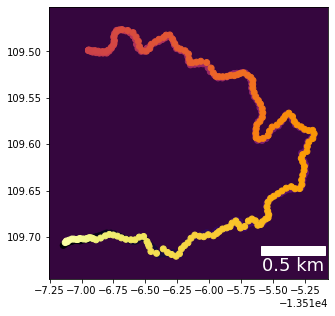

In [71]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111 , facecolor='xkcd:dark purple')
ax.invert_yaxis()
XLIM = ax.get_xlim()
YLIM = ax.get_ylim()
float_run = run.time.values.astype(float)
plt.scatter(110.574*run.longitude, 111.320*np.cos(run.latitude), c=float_run, cmap='inferno', norm=mpl.colors.LogNorm())

fontprops = fm.FontProperties(size=18)
scalebar = AnchoredSizeBar(ax.transData,
                           0.5, '0.5 km', 'lower right', 
                           pad=0.1,
                           color='white',
                           frameon=False,
                           size_vertical=0.01,
                           fontproperties=fontprops)

ax.add_artist(scalebar)

In [72]:
filenames = []
XLIM = (-13517.253473029403, -13515.067521843168)
YLIM = (109.74505434656481, 109.45177131860086)
for i in run.index:
    fig=plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111 , facecolor='xkcd:dark purple')
    ax.invert_yaxis()
    snapshot = run.loc[0:i]
    float_run = snapshot.time.values.astype(float)
    ax.scatter(110.574*snapshot.longitude, 111.320*np.cos(snapshot.latitude), c=float_run, cmap='inferno', norm=mpl.colors.LogNorm())
    ax.set_xlim(XLIM)
    ax.set_ylim(YLIM)
    ax.set_axis_off()
    ax.add_artist(ax.patch)
    ax.patch.set_zorder(-1)
    
    #Add a scalebar
    fontprops = fm.FontProperties(size=18)
    scalebar = AnchoredSizeBar(ax.transData,
                           0.5, '0.5 km', 'lower right', 
                           pad=0.1,
                           color='white',
                           frameon=False,
                           size_vertical=0.01,
                           fontproperties=fontprops)

    ax.add_artist(scalebar)
    
    # create file name and append it to a list
    filename = f'{i}.png'
    filenames.append(filename)
    
    # repeat last frame
    if (i == len(run.index)-1):
        for j in range(15):
            filenames.append(filename)
    
    # save frame
    fig.savefig(filename)
    plt.close()
    


In [73]:
# build gif    
frames = []

for filename in filenames:
    if filename.endswith(".png"):
        frames.append(imageio.imread(filename))


# Save them as frames into a gif 
exportname = "output.gif"
kargs = { 'fps': 100 }
imageio.mimsave(exportname, frames, 'GIF', **kargs)


    

In [74]:
# Remove files
for filename in set(filenames):
    os.remove(filename)

In [55]:
folder_path = '.'
#using listdir() method to list the files of the folder
test = os.listdir(folder_path)
#taking a loop to remove all the images
#using ".png" extension to remove only png images
#using os.remove() method to remove the files
for images in test:
    if images.endswith(".png"):
        os.remove(os.path.join(folder_path, images))